### Import all mondules that will be used

In [22]:
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
def tab(frame, format):
    return tabulate(frame, headers='keys', tablefmt=format)

In [24]:
# Making the csv file readable
df = pd.read_csv('orderHistory.csv')

In [25]:
#Filling missing calues with 0
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Website                         687 non-null    object 
 1   Order ID                        687 non-null    object 
 2   Order Date                      687 non-null    object 
 3   Purchase Order Number           687 non-null    object 
 4   Currency                        687 non-null    object 
 5   Unit Price                      687 non-null    float64
 6   Unit Price Tax                  687 non-null    float64
 7   Shipping Charge                 687 non-null    float64
 8   Total Discounts                 687 non-null    object 
 9   Total Owed                      687 non-null    float64
 10  Shipment Item Subtotal          687 non-null    object 
 11  Shipment Item Subtotal Tax      687 non-null    object 
 12  ASIN                            687 

In [26]:
#Filling missing calues with 0
df = df.fillna(0)

In [9]:
# Removing non-numeric characters and converting them to floats
df["Shipment Item Subtotal"] = pd.to_numeric(df["Shipment Item Subtotal"].str.replace('[^\d.]', '', regex=True), errors='coerce')

In [10]:
# getting all the addresses used by using the unique method so there are no repeats
addresses = df["Shipping Address"].unique()
addresses

array(['Imir Ransom 1141 Creekside Dr Wilmington DE 19804 United States',
       'Stephanie Pullins 3007 N STILLMAN ST PHILADELPHIA PA 19132-1306 United States',
       'Ahmad Benefield 3007 N STILLMAN ST PHILADELPHIA PA 19132-1306 United States',
       'Teyonna Pullins 3007 N STILLMAN ST PHILADELPHIA PA 19132-1306 United States',
       'Imir 1140 CREEKSIDE DR APT 1 WILMINGTON DE 19804-3931 United States',
       'Imir Ransom 2005 CERVANTES CT NEWARK DE 19702-4401 United States',
       'Stephanie Pullins 2626 N BANCROFT ST PHILADELPHIA PA 19132-3933 United States',
       'Imir 2005 CERVANTES CT NEWARK DE 19702-4401 United States',
       'Sadie Graham 203 ATLANTIC AVE WILMINGTON DE 19804-1432 United States',
       'Jeffrey Mullen 203 ATLANTIC AVE WILMINGTON DE 19804-1432 United States',
       'Imir 33 WENARK DR APT 12 NEWARK DE 19713-1442 United States',
       'Imir Ransom 83 PIKE CREEK RD APT 1B NEWARK DE 19711-6819 United States',
       'Imir Ransom 2 Indepence Hall Newark De

In [11]:
steph1 = addresses[1]
steph2 = addresses[6] 
steph1

'Stephanie Pullins 3007 N STILLMAN ST PHILADELPHIA PA 19132-1306 United States'

In [12]:
steph2

'Stephanie Pullins 2626 N BANCROFT ST PHILADELPHIA PA 19132-3933 United States'

In [27]:
s = df.groupby(['Shipping Address'])['Shipment Item Subtotal'].sum().reset_index()
s

,Shipping Address,Shipment Item Subtotal
0,Ahmad Benefield 3007 N STILLMAN ST PHILADELPHI...,5.6959.95
1,Imir 1140 CREEKSIDE DR APT 1 WILMINGTON DE 198...,145.48
2,Imir 2005 CERVANTES CT NEWARK DE 19702-4401 Un...,24.959.9521.99484845.1545.1544.9311.944.9344.9...
3,Imir 33 WENARK DR APT 12 NEWARK DE 19713-1442 ...,9.999.499.4921.9821.9815.5534.2619.9934.2612.9...
4,Imir Ransom 1141 Creekside Dr Wilmington DE 19...,129.9918.9916.0422.9949.999.7325.9910.9999.951...
5,Imir Ransom 2 Indepence Hall Newark Delaware 1...,7.512.96.4
6,Imir Ransom 2005 CERVANTES CT NEWARK DE 19702-...,9522.978.8210.9918.9842.9914.99
7,Imir Ransom 83 PIKE CREEK RD APT 1B NEWARK DE ...,299.9910.996.4510.9221.9945.79
8,Jeffrey Mullen 203 ATLANTIC AVE WILMINGTON DE ...,179
9,Sadie Graham 203 ATLANTIC AVE WILMINGTON DE 19...,33.99


In [28]:
s = df.groupby(['Shipping Address'])['Total Owed'].sum().reset_index()
s

,Shipping Address,Total Owed
0,Ahmad Benefield 3007 N STILLMAN ST PHILADELPHI...,65.98
1,Imir 1140 CREEKSIDE DR APT 1 WILMINGTON DE 198...,145.48
2,Imir 2005 CERVANTES CT NEWARK DE 19702-4401 Un...,646.81
3,Imir 33 WENARK DR APT 12 NEWARK DE 19713-1442 ...,1142.67
4,Imir Ransom 1141 Creekside Dr Wilmington DE 19...,1366.06
5,Imir Ransom 2 Indepence Hall Newark Delaware 1...,50.57
6,Imir Ransom 2005 CERVANTES CT NEWARK DE 19702-...,221.71
7,Imir Ransom 83 PIKE CREEK RD APT 1B NEWARK DE ...,381.13
8,Jeffrey Mullen 203 ATLANTIC AVE WILMINGTON DE ...,173.63
9,Sadie Graham 203 ATLANTIC AVE WILMINGTON DE 19...,39.98


Need to make a column with the addresses reflecting the names of those associated with them

In [64]:
# Creating a function that will be later used to implement a name based on the address in the DataFrame
def get_name(name):
    if name == 'Stephanie Pullins 3007 N STILLMAN ST PHILADELPHIA PA 19132-1306 United States'\
    or name == 'Stephanie Pullins 2626 N BANCROFT ST PHILADELPHIA PA 19132-3933 United States':
        return "Stephanie"
    elif name == 'Ahmad Benefield 3007 N STILLMAN ST PHILADELPHIA PA 19132-1306 United States':
        return "Ahmad"
    elif name == 'Teyonna Pullins 3007 N STILLMAN ST PHILADELPHIA PA 19132-1306 United States':
        return "Teyonna"
    elif name == 'Sadie Graham 203 ATLANTIC AVE WILMINGTON DE 19804-1432 United States':
        return "Sadie"
    elif name == 'Jeffrey Mullen 203 ATLANTIC AVE WILMINGTON DE 19804-1432 United States':
        return "Jeffrey"
    elif name == 'Imir Ransom 1141 Creekside Dr Wilmington DE 19804 United States'\
    or name == 'Imir 1140 CREEKSIDE DR APT 1 WILMINGTON DE 19804-3931 United States'\
    or name == 'Imir Ransom 2005 CERVANTES CT NEWARK DE 19702-4401 United States'\
    or name == 'Imir 2005 CERVANTES CT NEWARK DE 19702-4401 United States'\
    or name == 'Imir 33 WENARK DR APT 12 NEWARK DE 19713-1442 United States'\
    or name == 'Imir Ransom 83 PIKE CREEK RD APT 1B NEWARK DE 19711-6819 United States'\
    or name == 'Imir Ransom 2 Indepence Hall Newark Delaware 19711 United States':
        return "Imir"
    

In [65]:
# Applying this function to the age column using the apply() method and assigning the result to a new coumn called name
df['Name'] = df['Shipping Address'].apply(get_name)
# New info for the new column added
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Website                         687 non-null    object 
 1   Order ID                        687 non-null    object 
 2   Order Date                      687 non-null    object 
 3   Purchase Order Number           687 non-null    object 
 4   Currency                        687 non-null    object 
 5   Unit Price                      687 non-null    float64
 6   Unit Price Tax                  687 non-null    float64
 7   Shipping Charge                 687 non-null    float64
 8   Total Discounts                 687 non-null    object 
 9   Total Owed                      687 non-null    float64
 10  Shipment Item Subtotal          687 non-null    object 
 11  Shipment Item Subtotal Tax      687 non-null    object 
 12  ASIN                            687 

In [66]:
# Getting the unique names from the DataFrame
df['Name'].unique()

array(['Imir', 'Stephanie', 'Ahmad', 'Teyonna', 'Sadie', 'Jeffrey'],
      dtype=object)

## Who spent the most money?
### DataFrame
After getting the `Name` of those that made purchases on the account using the `Shipping Address` column,
I find the sum of the `Total Owed` (the total amount of purchases they made) and group them together
to see who made the most purchases since the beginning of the account

In [67]:
#df.sort_values('Name')

In [71]:
overall_sum = df.groupby(['Name'])['Total Owed'].sum().reset_index()
overall_sum

,Name,Total Owed
0,Ahmad,65.98
1,Imir,3954.43
2,Jeffrey,173.63
3,Sadie,39.98
4,Stephanie,7935.95
5,Teyonna,23.05


## Who spent the most money
### Plotted
The y axis is the total amount spent. I used my variable `overall_sum` to represent the total amont spent so that it was the same
size as my x axis. I also made the x axis the same size using the method `unique` since the sum of from the `Total Owed` only gives the
unique column names since they were grouped together in using the measurement `sum`. <break>
    
Though, the next issue I had was `df['Name'].unique()` was putting the names in the incorrect order, for the `overall_sum` DataFrame has
the names in alphabetical order. So, I casted the `sorted` function over it so that `Name` column would return in alphabetical order,
matching it up with it's respective data.

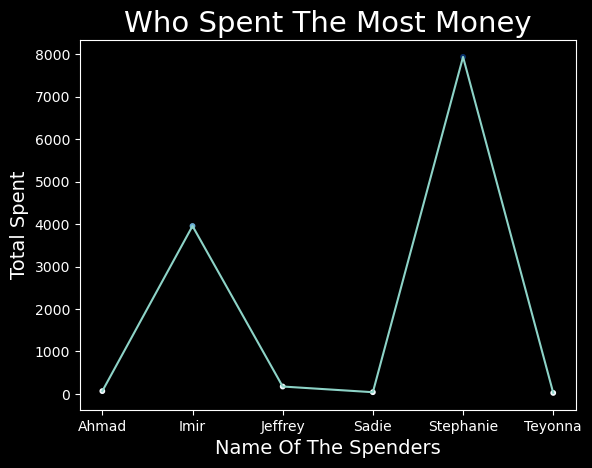

In [69]:
x = sorted(df['Name'].unique())
y = overall_sum['Total Owed']
plt.style.use('dark_background')
fig, ax = plt.subplots()
ax.scatter(x, y, c=y, cmap=plt.cm.Blues, s=10)
ax.set_title('who spent the most money'.title(), fontsize=21)
ax.set_xlabel("name of the spenders".title(), fontsize=14)
ax.set_ylabel('total spent'.title(), fontsize=14)


plt.plot(x, y)
plt.show()

In [85]:
# This function will be used to get the months of each purchase using the order date column
def get_month(month):
    if month >= "2023-01-01" and month < "2023-02-01":
        return 'January'
    elif month >= "2023-02-01" and month < "2023-03-01":
        return 'February'
    elif month >= "2023-03-01" and month < "2023-04-01":
        return 'March'
    elif month >= "2023-04-01" and month < "2023-05-01":
        return 'April'
    elif month >= "2023-05-01" and month < "2023-06-01":
        return 'May'
    elif month >= "2023-06-01" and month < "2023-07-01":
        return 'June'
    elif month >= "2023-07-01" and month < "2023-08-01":
        return 'July'
    elif month >= "2023-08-01" and month < "2023-09-01":
        return 'August'
    elif month >= "2023-09-01" and month < "2023-10-01":
        return 'September'
    elif month >= "2023-10-01" and month < "2023-11-01":
        return 'October'
    elif month >= "2023-11-01" and month < "2023-12-01":
        return 'November'
    elif month >= "2023-12-01" and month < "2024-01-01":
        return 'December'
    

In [86]:
df['Month'] = df['Order Date'].apply(get_month)

### The amount of orders for each month in 2023

In [87]:
dates_and_months = df.groupby(['Month'])['Order Date'].size().reset_index()
dates_and_months

,Month,Order Date
0,April,45
1,February,95
2,January,102
3,July,58
4,June,69
5,March,25
6,May,62


### The amount of orders for each month in 2023 by each person

In [88]:
# Using the measurement size to get the amount of orders for the month of each person
dates_and_months = df.groupby(['Month', 'Name'])['Order Date'].size().reset_index()
dates_and_months

,Month,Name,Order Date
0,April,Imir,4
1,April,Stephanie,41
2,February,Ahmad,1
3,February,Imir,2
4,February,Stephanie,92
5,January,Imir,7
6,January,Stephanie,95
7,July,Imir,4
8,July,Stephanie,54
9,June,Ahmad,1


In [89]:
pivoted_df = dates_and_months.pivot(
    columns='Name',
    index='Month',
    values='Order Date'
)
pivoted_df = pivoted_df.fillna(0)
pivoted_df

Name,Ahmad,Imir,Stephanie,Teyonna
Month,,,,
April,0.0,4.0,41.0,0.0
February,1.0,2.0,92.0,0.0
January,0.0,7.0,95.0,0.0
July,0.0,4.0,54.0,0.0
June,1.0,1.0,67.0,0.0
March,0.0,1.0,24.0,0.0
May,0.0,8.0,50.0,4.0


In [90]:
items_for_2023 = df[df["Order Date"] >= "2023-01-01"]
items_for_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456 entries, 0 to 455
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Website                         456 non-null    object 
 1   Order ID                        456 non-null    object 
 2   Order Date                      456 non-null    object 
 3   Purchase Order Number           456 non-null    object 
 4   Currency                        456 non-null    object 
 5   Unit Price                      456 non-null    float64
 6   Unit Price Tax                  456 non-null    float64
 7   Shipping Charge                 456 non-null    float64
 8   Total Discounts                 456 non-null    object 
 9   Total Owed                      456 non-null    float64
 10  Shipment Item Subtotal          456 non-null    object 
 11  Shipment Item Subtotal Tax      456 non-null    object 
 12  ASIN                            456 non-n

In [91]:
current_overall_sum = items_for_2023.groupby(['Name'])['Total Owed'].sum().reset_index()
current_overall_sum

,Name,Total Owed
0,Ahmad,65.98
1,Imir,710.09
2,Stephanie,6039.42
3,Teyonna,23.05


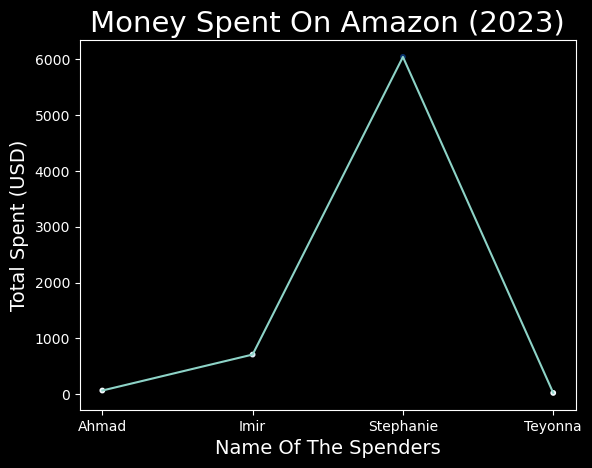

In [99]:
x = sorted(items_for_2023['Name'].unique())
y = current_overall_sum['Total Owed']
plt.style.use('dark_background')
fig, ax = plt.subplots()
ax.scatter(x, y, c=y, cmap=plt.cm.Blues, s=10)
ax.set_title('money spent on amazon (2023)'.title(), fontsize=21)
ax.set_xlabel("name of the spenders".title(), fontsize=14)
ax.set_ylabel('total spent'.title() + ' (USD)', fontsize=14)
plt.plot(x, y)
plt.show()